### LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import pywt
from scipy.fftpack import fft,ifft,fftfreq
from scipy.signal import butter, lfilter, filtfilt, lfiltic , iirpeak, freqs, welch, iirfilter, hilbert
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
import scipy
from scipy import stats
from scipy.stats import gamma
import matplotlib.mlab as mlab
%matplotlib inline

### IMPORT DATA ON A DATAFRAME

In [38]:
filename1 = "1_Stave_supine_static.txt"
data_read = pd.read_table(filename1)

# Full data as dataframe
data = pd.DataFrame(data_read)

# Frequency
Freq = data['Log Freq'][1]              

# Reconstructing Real_Time
Time_stamp = data[['Timestamp']]        
data_time = pd.DataFrame(np.asarray(range(len(Time_stamp)))*(1/Freq), columns=['Time'])

# Acc & Gyro data on the three axis
data_ag = pd.concat([data_time,data[['AccX','AccY','AccZ']], data[['GyroX','GyroY','GyroZ']]],axis=1)

data

Log Mode  Log Freq   Timestamp     AccX     AccY      AccZ       GyroX  \
0            5       100  1555487493  490.379  308.172   863.028  -40.731710   
1            5       100  1555487493   32.513  230.153  1015.406   23.902440   
2            5       100  1555487493   36.539  256.200  1012.051  -21.463420   
3            5       100  1555487493   65.331  241.194  1013.454  -30.243900   
4            5       100  1555487493   19.337  250.649  1004.121  -35.731710   
5            5       100  1555487493  -12.322  250.039   993.995  -39.756100   
6            5       100  1555487493  -41.053  230.824   989.664  -41.341460   
7            5       100  1555487493 -111.142  226.188   945.927  -42.073170   
8            5       100  1555487493 -158.722  221.674   978.196  -36.707320   
9            5       100  1555487493  -35.380  217.038   989.908  -34.878050   
10           5       100  1555487493   21.045  227.835  1036.451  -28.780490   
11           5       100  1555487493   26.535  233.996  1061.644  -22.560980   
12           5       100  1555487493   56.669  234.911  1044.015  -21.463420   
13           5       100  1555487493   38.491  233.935  1054.080  -19.268290   
14           5       100  1555487715   52.399  215.513  1011.929  -18.414630   
15           5       100  1555487715   57.645  224.175  1015.162  -12.682930   
16           5       100  1555487715   37.759  232.349  1046.760  -10.731710   
17           5       100  1555487715   17.324  203.618  1053.409  -12.317070   
18           5       100  1555487715  -68.869  196.298  1071.221  -10.609760   
19           5       100  1555487715 -102.602  176.046  1045.113   -2.439024   
20           5       100  1555487715 -109.983  137.433   958.798  -13.048780   
21           5       100  1555487715  -12.749  172.447   977.586  -12.560980   
22           5       100  1555487715   77.714  190.137  1012.600  -10.000000   
23           5       100  1555487715  142.862  215.818   979.172   -5.975610   
24           5       100  1555487715  147.437  201.056   982.283   -4.756098   
25           5       100  1555487715   94.245  207.278   965.569   -2.560976   
26           5       100  1555487715   82.960  215.940   993.263    2.804878   
27           5       100  1555487715   31.476  249.612   874.557   10.000000   
28           5       100  1555487715  -26.779  995.459   142.923  -46.463420   
29           5       100  1555487715  288.652  216.123  1115.202 -251.585400   
...        ...       ...         ...      ...      ...       ...         ...   
9140         5       100  1555487804   65.270 -684.237   793.915  -12.317070   
9141         5       100  1555487804   59.719 -666.852   761.585  -20.853660   
9142         5       100  1555487804   76.921 -642.757   691.191  -26.951220   
9143         5       100  1555487804  100.772 -616.954   671.183  -31.463420   
9144         5       100  1555487804  140.117 -644.587   661.972  -35.243900   
9145         5       100  1555487804   98.881 -653.493   679.418  -37.926830   
9146         5       100  1555487804   66.429 -697.962   715.408  -38.902440   
9147         5       100  1555487804   50.813 -761.707   767.502  -43.292680   
9148         5       100  1555487804   25.498 -808.799   841.983  -41.585370   
9149         5       100  1555487804   50.081 -840.641   864.919  -34.512200   
9150         5       100  1555487804   48.617 -851.133   879.681  -23.292680   
9151         5       100  1555487804   46.787 -841.922   864.004  -11.951220   
9152         5       100  1555487804   33.977 -835.822   820.389   -3.536585   
9153         5       100  1555487804   74.664 -823.073   797.758    0.000000   
9154         5       100  1555487804   71.370 -789.279   808.250    2.560976   
9155         5       100  1555487804   71.736 -812.825   879.315   10.853660   
9156         5       100  1555487805   73.383 -817.034   957.273   18.414630   
9157         5       100  1555487805    4.514 -820.633  1032.242   24.146340   
9158  

### FIRST PLOT VIEW

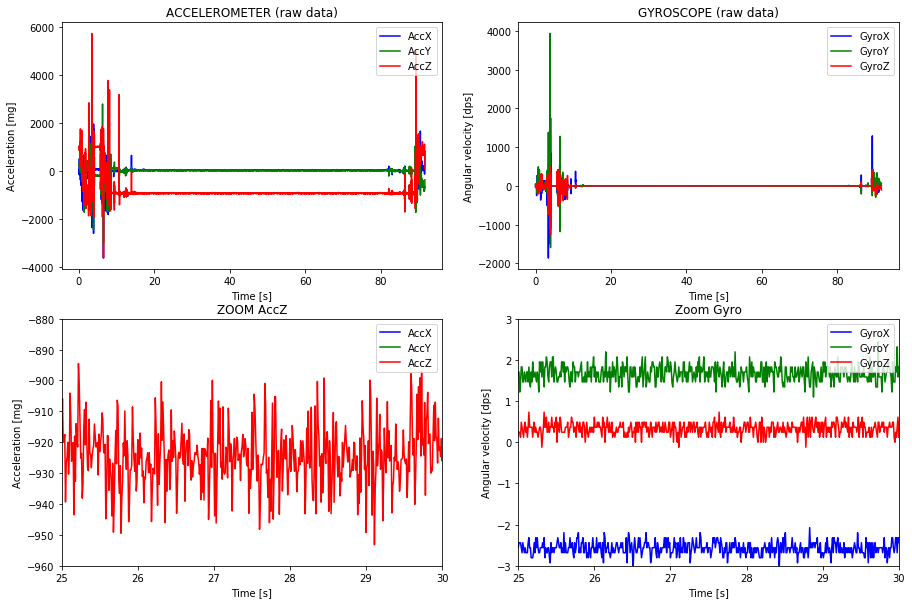

In [3]:
fig, axs = plt.subplots(2,2,figsize = (15,10))

axs[0,0].plot(data_ag['Time'],data_ag['AccX'],'b-',label='AccX')
axs[0,0].plot(data_ag['Time'],data_ag['AccY'],'g-',label='AccY')
axs[0,0].plot(data_ag['Time'],data_ag['AccZ'],'r-',label='AccZ')
axs[0,0].set_title( "ACCELEROMETER (raw data)")
axs[0,0].set_ylabel("Acceleration [mg]")
axs[0,0].set_xlabel('Time [s]')
axs[0,0].legend(loc=1)
#axs[0,0].set_xlim([15,20])
#axs[0,0].set_ylim([-1000,-900])
#################################
axs[0,1].plot(data_ag['Time'],data_ag['GyroX'],'b-',label='GyroX')
axs[0,1].plot(data_ag['Time'],data_ag['GyroY'],'g-',label='GyroY')
axs[0,1].plot(data_ag['Time'],data_ag['GyroZ'],'r-',label='GyroZ')
axs[0,1].set_title( "GYROSCOPE (raw data)")
axs[0,1].set_ylabel("Angular velocity [dps]")
axs[0,1].set_xlabel('Time [s]')
axs[0,1].legend(loc=1)
#######################################
axs[1,0].plot(data_ag['Time'],data_ag['AccX'],'b-',label='AccX')
axs[1,0].set_ylim([-1020,250])
#axs[1,0].set_ylim([-1000,-900])
axs[1,0].set_xlim([25,30])
axs[1,0].plot(data_ag['Time'],data_ag['AccY'],'g-',label='AccY')
axs[1,0].plot(data_ag['Time'],data_ag['AccZ'],'r-',label='AccZ')
axs[1,0].set_title( "ZOOM AccZ")
axs[1,0].set_ylabel("Acceleration [mg]")
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylim([-960,-880])
axs[1,0].legend(loc=1)
########################################
axs[1,1].plot(data_ag['Time'],data_ag['GyroX'],'b-',label='GyroX')
axs[1,1].plot(data_ag['Time'],data_ag['GyroY'],'g-',label='GyroY')
axs[1,1].plot(data_ag['Time'],data_ag['GyroZ'],'r-',label='GyroZ')
axs[1,1].set_title( "Zoom Gyro")
axs[1,1].set_ylabel("Angular velocity [dps]")
axs[1,1].set_xlabel('Time [s]')
axs[1,1].legend(loc=1)
axs[1,1].set_ylim([-3,3])
axs[1,1].set_xlim([25,30])

plt.savefig('01_raw_data.png', bbox_inches = "tight")

### Selecting window for data  

In [4]:
data_small_ag = data_ag[(data_ag['Time'] >= 20) & (data_ag['Time'] < 80)]
df_describe = data_small_ag.describe()
df_describe = df_describe.rename(columns={"Time": "Time [s]", "AccX": "AccX [mg]", "AccY": "AccY [mg]", "AccZ": "AccZ [mg]", "GyroX": "GyroX [rad/s]", "GyroY": "GyroY [rad/s]", "GyroZ": "GyroZ [rad/s]"})
df_describe.iloc[:,1:].round(1)

AccX [mg]  AccY [mg]  AccZ [mg]  GyroX [rad/s]  GyroY [rad/s]  \
count     6000.0     6000.0     6000.0         6000.0         6000.0   
mean        44.2       21.5     -924.2           -2.5            1.7   
std          4.6        3.0        9.7            0.1            0.2   
min         26.5        8.3     -954.6           -3.2            1.1   
25%         41.4       19.6     -929.2           -2.7            1.6   
50%         44.2       21.5     -924.2           -2.6            1.7   
75%         46.9       23.5     -919.1           -2.4            1.8   
max         63.6       33.7     -891.6           -2.1            2.4   

       GyroZ [rad/s]  
count         6000.0  
mean             0.3  
std              0.2  
min             -0.2  
25%              0.2  
50%              0.4  
75%              0.5  
max              1.0

## Fourier Function

In [5]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2]) 
    return f_values, fft_values

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def FFT_analysis(y_values, T, length_data):                        # Directly Fourier for Filter
    x_FFT = np.fft.fftfreq(length_data, T)
    y_FFT = np.fft.fft(y_values)
    df_FFT = pd.DataFrame({'Freq':x_FFT, 'Amplitude':y_FFT})
    return df_FFT

def FFT_filter(df_FFT, Freq_min, Freq_max):                       #Filtering using a Fourier interval
    df_FFT[df_FFT['Freq'].abs() < Freq_min] = 0
    df_FFT[df_FFT['Freq'].abs() > Freq_max] = 0
    Antitransform = np.fft.ifft(df_FFT['Amplitude'])
    return Antitransform

## FILTER

In [6]:
def my_filter(filter_order, frequency_in, filter_type ,sampling_freq_system, data_in):
    b,a = butter(filter_order,frequency_in, filter_type, fs = sampling_freq_system)
    frequency_responsew,h = freqs(b,a)
    data_filtered = filtfilt(b,a, data_in)  
    return data_filtered 

def my_narrow(frequency_in , fs , quality_factor, data_in):
    w0 = frequency_in/(fs/2)
    b, a = iirpeak(w0, quality_factor)
    data_filtered = filtfilt(b,a, data_in)  
    return data_filtered

def iir_filter(filter_order, frequency_in, filter_type , design, data_in, sampling_freq_system):
    b,a = iirfilter(filter_order,frequency_in, btype=filter_type, ftype=design, fs=sampling_freq_system)
    data_filtered = filtfilt(b,a, data_in)
    return data_filtered


## Finding maxima

In [7]:
def maxima_minima(time, filtereddata):
    df_filter = pd.DataFrame({'Time':time, 'Filtered':filtereddata})
    df_filter['min'] = df_filter.iloc[argrelextrema(df_filter.Filtered.values, np.less_equal, order=10)[0]]['Filtered']
    df_filter['max'] = df_filter.iloc[argrelextrema(df_filter.Filtered.values, np.greater_equal, order=10)[0]]['Filtered']
    return df_filter

def find_min(df_filter):
    time_max_array = df_filter[['Time', 'min']]
    value_best = time_max_array[(time_max_array['min'] < 0)]  
    difference = value_best.diff()
    return difference.dropna()
    
def find_max(df_filter):
    time_max_array = df_filter[['Time', 'max']]
    value_best = time_max_array[(time_max_array['max'] < 0)]  
    difference = value_best.diff()
    return difference.dropna()

# FFT analysis & filter

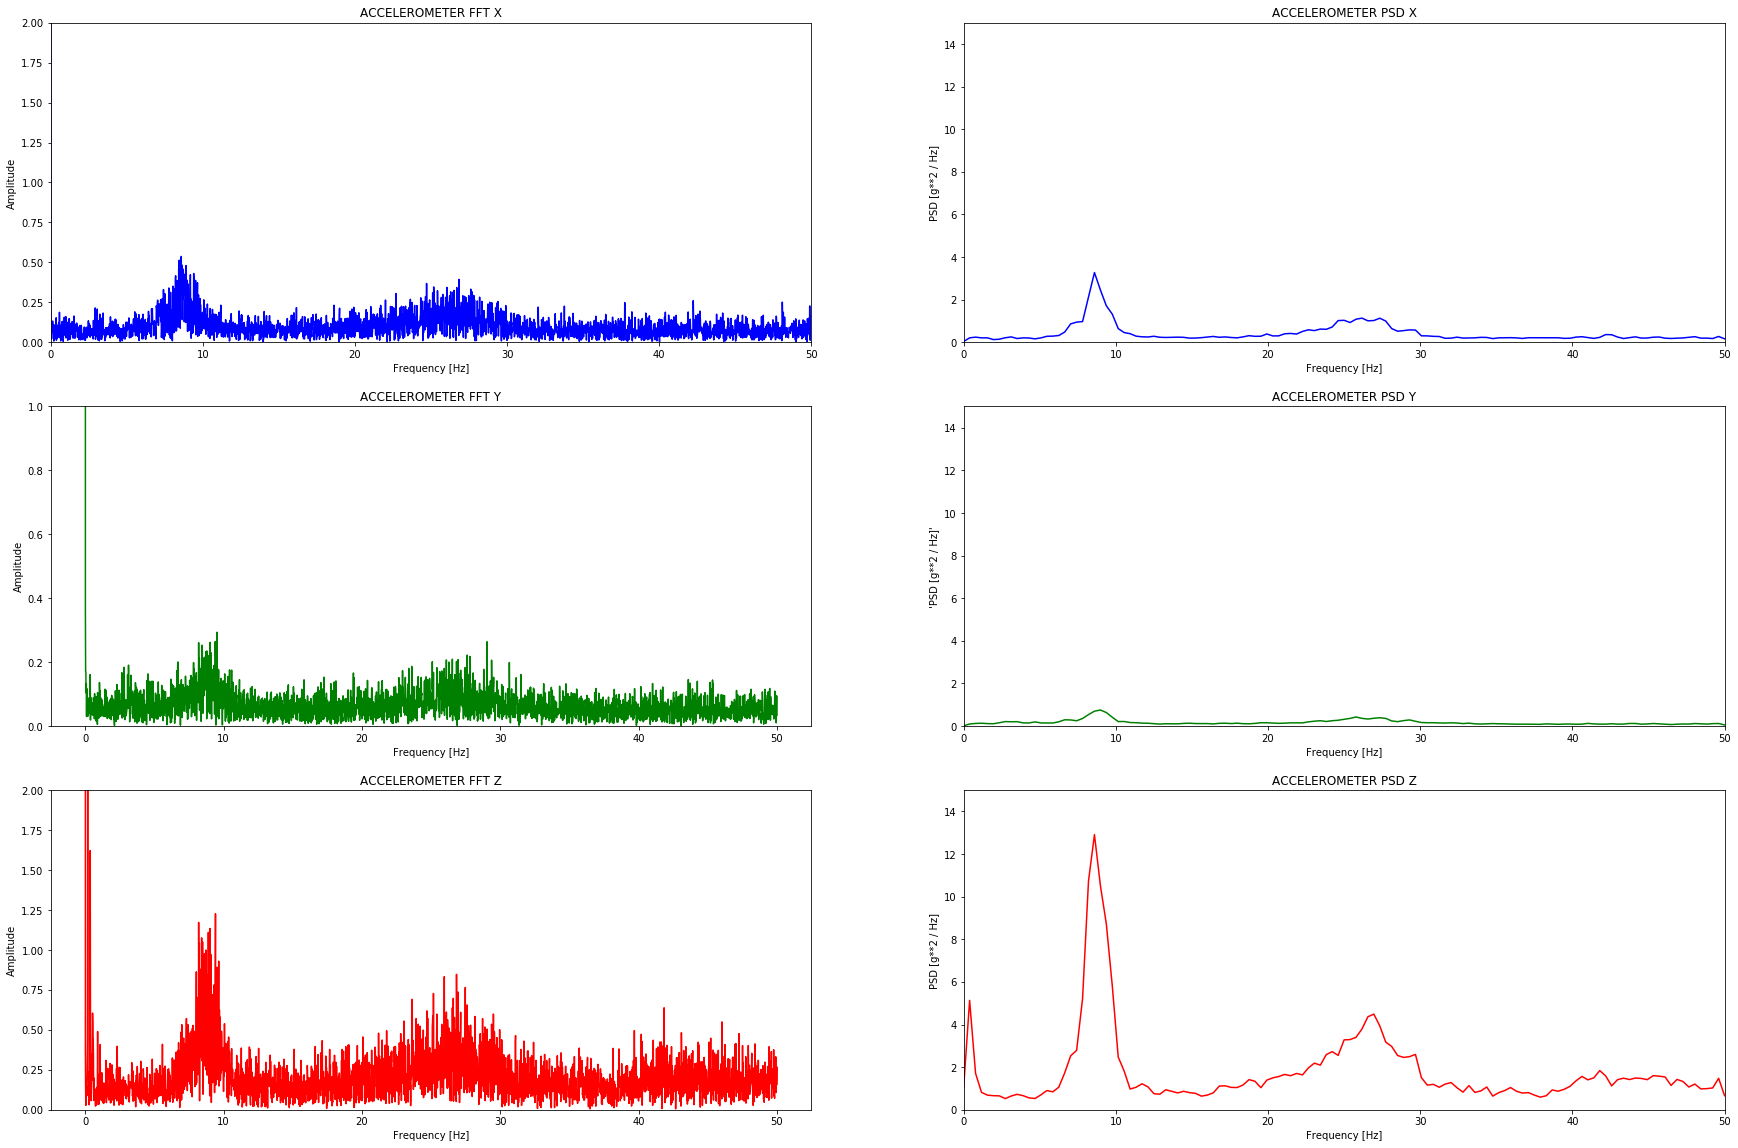

In [8]:
N = data_small_ag.shape[0]
T = 1/Freq   
f_s = Freq   

f_values, fft_values = get_fft_values(data_small_ag['AccX'], T, N, f_s)
f_values_psd, psd_values = get_psd_values(data_small_ag['AccX'], T, N, f_s)

f_values_g, fft_values_g = get_fft_values(data_small_ag['AccY'], T, N, f_s)
f_values_psd_g, psd_values_g = get_psd_values(data_small_ag['AccY'], T, N, f_s)

f_values_z, fft_values_z = get_fft_values(data_small_ag['AccZ'], T, N, f_s)
f_values_psd_z, psd_values_z = get_psd_values(data_small_ag['AccZ'], T, N, f_s)

#PLOTTING
fig, axs = plt.subplots(3,2,figsize = (30,20))
axs[0,0].plot(f_values,fft_values,'b')
axs[0,0].set_title( "ACCELEROMETER FFT X")
#axs[0,0].axis([0,50,0,0.3])
axs[0,0].axis([0,50,0,2])
axs[0,0].set_ylabel("Amplitude")
axs[0,0].set_xlabel('Frequency [Hz]')
axs[0,1].plot(f_values_psd, psd_values, linestyle='-', color='blue')
axs[0,1].set_title("ACCELEROMETER PSD X")
axs[0,1].axis([0,50,0,15])
axs[0,1].set_ylabel("PSD [g**2 / Hz]")
axs[0,1].set_xlabel('Frequency [Hz]')
##############################################
axs[1,0].plot(f_values_g,fft_values_g,'g')
axs[1,0].set_title( "ACCELEROMETER FFT Y")
#axs[1,0].axis([0,50,0,0.3])
axs[1,0].set_ylim([0,1])
axs[1,0].set_ylabel("Amplitude")
axs[1,0].set_xlabel('Frequency [Hz]')
axs[1,1].plot(f_values_psd_g, psd_values_g, linestyle='-', color='g')
axs[1,1].axis([0,50,0,15])
axs[1,1].set_title("ACCELEROMETER PSD Y")
axs[1,1].set_ylabel("'PSD [g**2 / Hz]'")
axs[1,1].set_xlabel('Frequency [Hz]')
##############################################
axs[2,0].plot(f_values_z,fft_values_z,'r')
axs[2,0].set_title( "ACCELEROMETER FFT Z")
#axs[2,0].axis([0,50,0,0.3])
axs[2,0].set_ylim([0,2])
axs[2,0].set_ylabel("Amplitude")
axs[2,0].set_xlabel('Frequency [Hz]')
axs[2,1].plot(f_values_psd_z, psd_values_z, linestyle='-', color='r')
axs[2,1].set_title("ACCELEROMETER PSD Z")
axs[2,1].axis([0,50,0,15])
axs[2,1].set_ylabel("PSD [g**2 / Hz]")
axs[2,1].set_xlabel('Frequency [Hz]')

plt.savefig('03_acc_freq_undermat.png', bbox_inches = "tight")

In [9]:
mean_ampl_acc1 = data_small_ag[['AccZ']].mean()
mean_ampl_acc = mean_ampl_acc1[0]

In [10]:
############################################################################################
result_2 = my_filter(3, [25,31] , 'band', 100, data_small_ag['AccZ'])
############################################################################################
#result_3 = my_narrow(28, 100, 1, data_small_ag['AccZ'])
#result_2 = my_filter(3, [6,11] , 'band', 100, data_small_ag['AccZ'])
#result_2 = iir_filter(4, [6,12] , 'bandpass', 'butter', data_small_ag['AccZ'], 200)


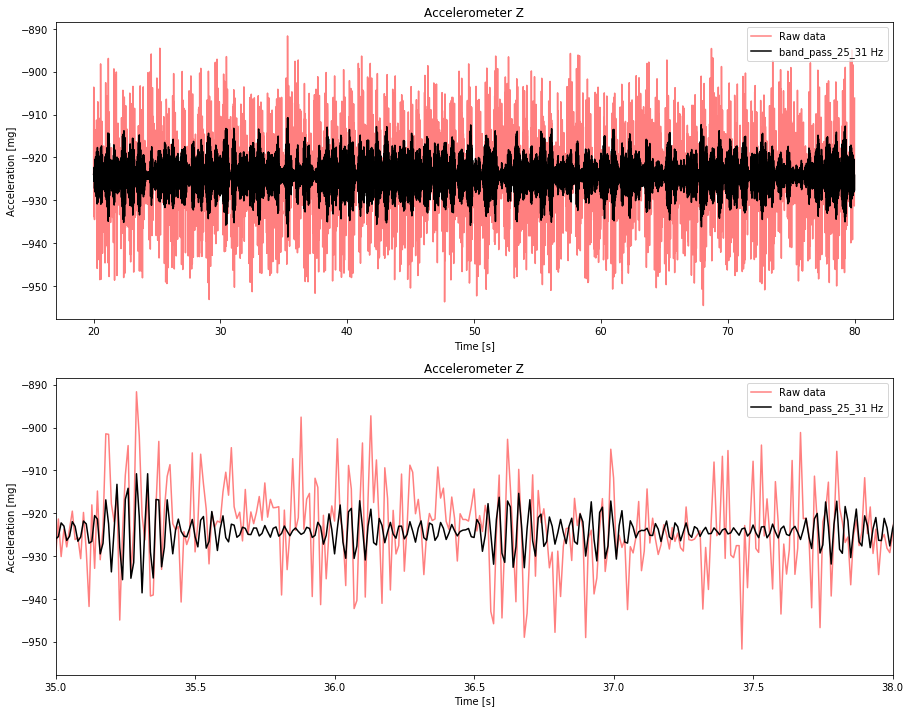

In [11]:
fig, axs = plt.subplots(2,1,figsize = (15,12))


######################################################################
axs[0].plot(data_small_ag['Time'],data_small_ag['AccZ'],'r', alpha = 0.5, label = 'Raw data')
axs[0].plot(data_small_ag['Time'], result_2+mean_ampl_acc,'k',label='band_pass_25_31 Hz')
axs[0].set_xlabel('Time [s]')
axs[0].set_title('Accelerometer Z')
axs[0].set_ylabel('Acceleration [mg]')
axs[0].legend(loc = 'upper right')
######################################################################
axs[1].plot(data_small_ag['Time'],data_small_ag['AccZ'],'r', alpha = 0.5, label = 'Raw data')
axs[1].plot(data_small_ag['Time'], result_2+mean_ampl_acc,'k',label='band_pass_25_31 Hz')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Accelerometer Z')
axs[1].set_ylabel('Acceleration [mg]')
axs[1].set_xlim([35,38])
axs[1].legend(loc = 'upper right')

plt.savefig('04_acc_bandpass.png', bbox_inches = "tight")

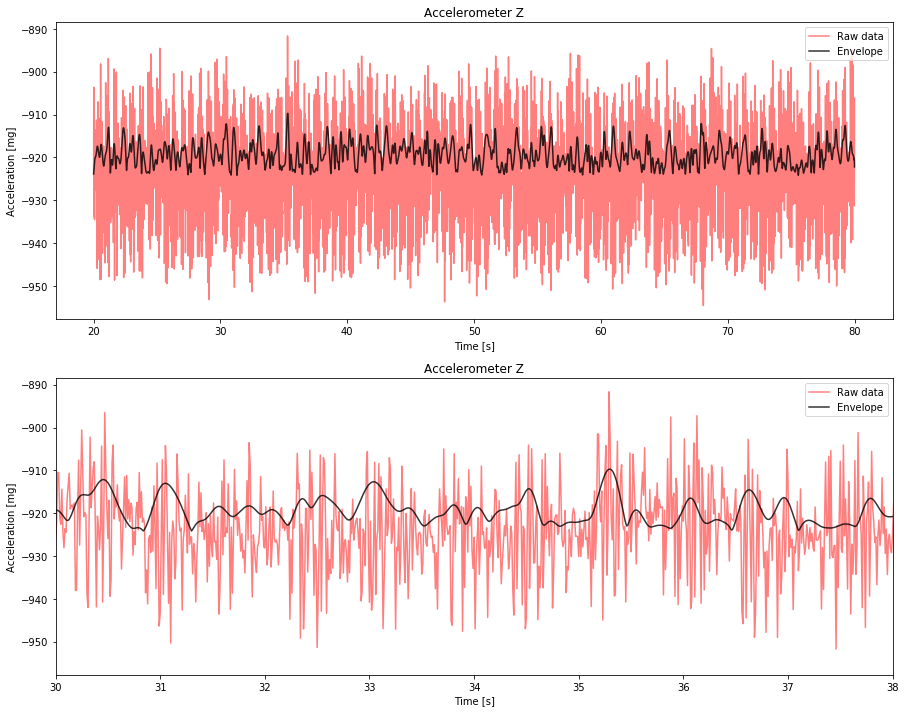

In [12]:
hilb_prv = hilbert(result_2)
amplitude_envelope = np.abs(hilb_prv)

fig, axs = plt.subplots(2,1,figsize = (15,12))
######################################################################
axs[0].plot(data_small_ag['Time'],data_small_ag['AccZ'],'r', alpha = 0.5, label = 'Raw data')
axs[0].plot(data_small_ag['Time'], amplitude_envelope+mean_ampl_acc,'k', alpha = 0.8,label='Envelope')
axs[0].set_xlabel('Time [s]')
axs[0].set_title('Accelerometer Z')
axs[0].set_ylabel('Acceleration [mg]')
axs[0].legend(loc = 'upper right')
######################################################################
axs[1].plot(data_small_ag['Time'],data_small_ag['AccZ'],'r', alpha = 0.5, label = 'Raw data')
axs[1].plot(data_small_ag['Time'], amplitude_envelope+mean_ampl_acc,'k',alpha = 0.8,label='Envelope')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Accelerometer Z')
axs[1].set_ylabel('Acceleration [mg]')
axs[1].set_xlim([30,38])
axs[1].legend(loc = 'upper right')

plt.savefig('05_acc_hilbert.png', bbox_inches = "tight")

# FIRST ALGORITHM

In [13]:
new_dataframe_envel = pd.DataFrame({'Time':data_small_ag['Time'], 'Filtered':amplitude_envelope+mean_ampl_acc})

result_ev_fil = my_filter(5, 2 , 'low', 100, amplitude_envelope+mean_ampl_acc)

#guarda i massimi
max_z_acc = maxima_minima(data_small_ag['Time'].values, result_ev_fil)

#look at time distance between max
tempi_max_z_acc = find_max(max_z_acc)

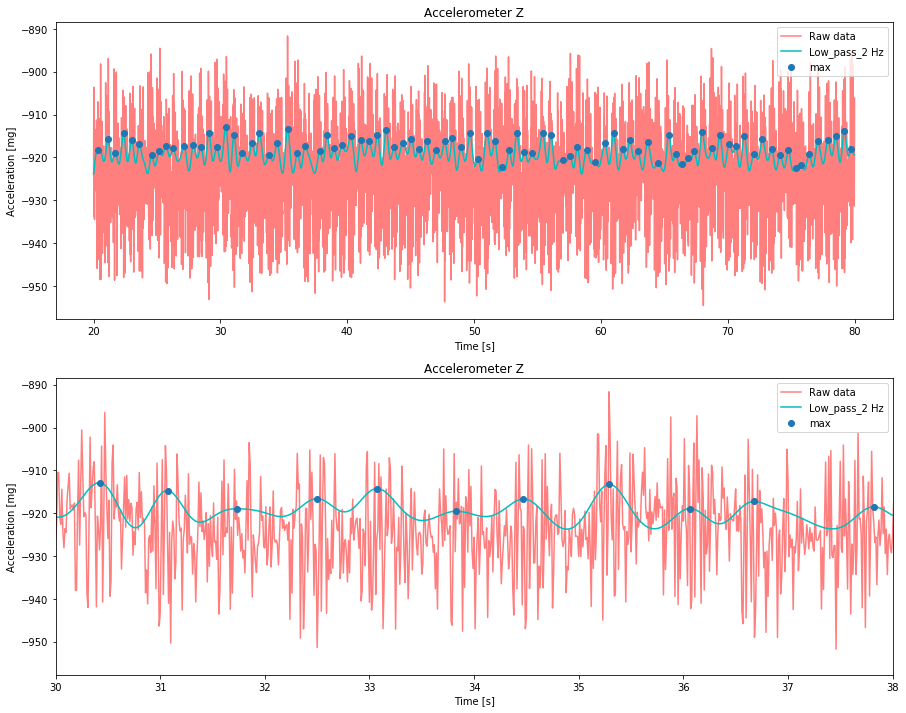

In [14]:
fig, axs = plt.subplots(2,1,figsize = (15,12))
######################################################################
axs[0].plot(data_small_ag['Time'],data_small_ag['AccZ'],'r', alpha = 0.5, label = 'Raw data')
axs[0].plot(data_small_ag['Time'], result_ev_fil,'c',label='Low_pass_2 Hz')
axs[0].set_xlabel('Time [s]')
axs[0].set_title('Accelerometer Z')
axs[0].set_ylabel('Acceleration [mg]')
axs[0].plot(max_z_acc['Time'], max_z_acc['max'], 'o')
axs[0].legend(loc = 'upper right')
######################################################################
axs[1].plot(data_small_ag['Time'],data_small_ag['AccZ'],'r', alpha = 0.5, label = 'Raw data')
axs[1].plot(data_small_ag['Time'], result_ev_fil,'c',label='Low_pass_2 Hz')
axs[1].plot(max_z_acc['Time'], max_z_acc['max'], 'o')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Accelerometer Z')
axs[1].set_ylabel('Acceleration [mg]')
axs[1].set_xlim([30,38])
axs[1].legend(loc = 'upper right')

plt.savefig('06_acc_hilbert.png', bbox_inches = "tight")

0.6670786516853933 0.11381240475815334


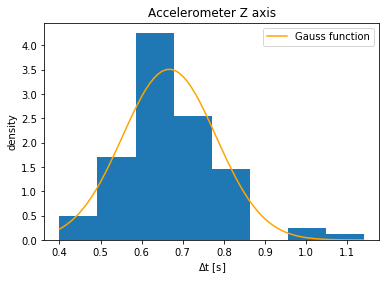

In [15]:
#histogram
from scipy.stats import norm

fit_alpha_max, fit_loc_max, fit_beta_max = stats.gamma.fit(tempi_max_z_acc['Time'].values)
(mi_x, sigma_x) = stats.norm.fit(tempi_max_z_acc['Time'].values)
gamma_max = gamma(fit_alpha_max, loc = fit_loc_max, scale = fit_beta_max)
gauss = norm(loc = mi_x, scale= sigma_x) 

x = np.arange( min(min(tempi_max_z_acc['Time'].values), min(tempi_max_z_acc['Time'].values)), max(max(tempi_max_z_acc['Time'].values), max(tempi_max_z_acc['Time'].values)) + 0.01, 0.01)

plt.hist(tempi_max_z_acc['Time'].values, bins = 8, density = True)
plt.plot(x, gauss.pdf(x), color = 'orange', label = "Gauss function")
plt.title("Accelerometer Z axis")
plt.xlabel("$\Delta$t [s]")
plt.ylabel("density")
plt.legend()

plt.savefig('07_acc_distrib.png', bbox_inches = "tight")
#plt.ylim([0,7])
print(mi_x, sigma_x)

In [16]:
mi = np.mean(tempi_max_z_acc['Time'].values)
sigma_x = np.std(tempi_max_z_acc['Time'].values)
print(mi, ' ', sigma_x)

0.6670786516853933   0.11381240475815334


In [17]:
print('The std of BPM',(60/(mi)**2)*sigma_x)
print('BPM:', 60/mi)

The std of BPM 15.345702183680414
BPM: 89.944416371905


In [18]:
from scipy.stats import skew, kurtosis

skew(tempi_max_z_acc['Time'], axis = 0)

1.0152751931161705

In [19]:
kurtosis(tempi_max_z_acc['Time'], axis = 0)#, fisher = 0)

2.5700406285796777

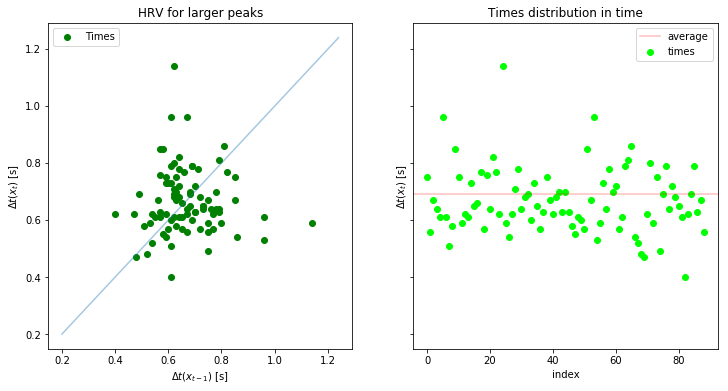

In [20]:
x = np.linspace(0.2, max(tempi_max_z_acc['Time'])+ 0.1 , 100)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

#da vedere se mettere
ax[0].scatter(tempi_max_z_acc['Time'].values[:-1], tempi_max_z_acc['Time'].values[1:], color = 'g', label = "Times")
ax[0].set_title("HRV for larger peaks")
ax[0].set_xlabel("$\Delta t (x_{t-1})$ [s]")
ax[0].set_ylabel("$\Delta t (x_{t})$ [s]")
ax[0].plot(x,x, alpha=0.4)
ax[0].legend()


ax[1].scatter(np.arange(len(tempi_max_z_acc['Time'].values)), tempi_max_z_acc['Time'].values, color = 'lime', label = "times")
ax[1].axhline(0.69, color = 'red', alpha = 0.25, label = 'average')
ax[1].set_title("Times distribution in time")
ax[1].set_xlabel("index")
ax[1].set_ylabel("$\Delta t (x_{t})$ [s]")
ax[1].legend()

plt.savefig('08_HRV_distrib.png', bbox_inches = "tight")


# SECOND ALGORITHM (changing also filter parameter!!!!)

In [21]:
result_2 = my_filter(3, [1,20] , 'band', 100, data_small_ag['AccZ'])

hilb_prv = hilbert(result_2)
amplitude_envelope = np.abs(hilb_prv)

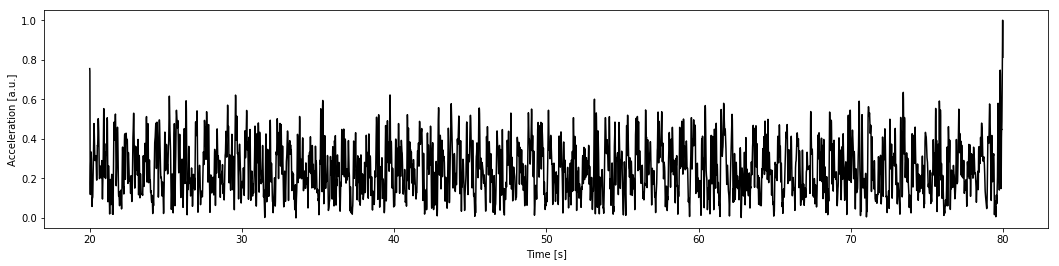

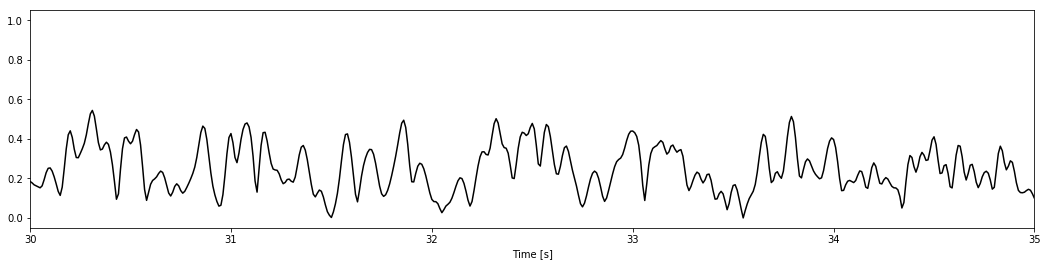

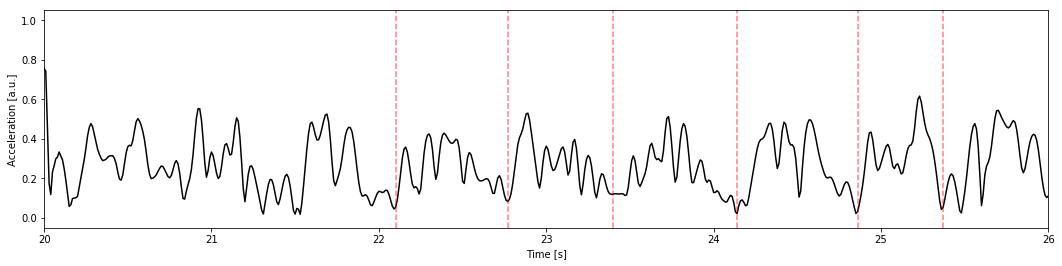

In [22]:
Filtered = pd.DataFrame({'Time':data_small_ag['Time'].values, 'values':amplitude_envelope})
#Filtered.columns = ["Time","values"]
#Filtered

maximum = np.max(Filtered["values"])
minimum = np.min(Filtered["values"])

Filtered["values"]= (Filtered["values"] - minimum)/(maximum - minimum)
Filtered.describe()

plt.figure
fig = plt.figure(figsize=(18,4))
plt.plot(Filtered['Time'],Filtered['values'],'k')
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [a.u.]")
plt.show()

fig = plt.figure(figsize=(18,4))
plt.plot(Filtered['Time'],Filtered['values'],'k')
plt.xlim([30,35])
plt.xlabel("Time [s]")
plt.show("Acceleration [a.u.]")

fig = plt.figure(figsize=(18,4))
plt.plot(Filtered['Time'],Filtered['values'],'k')
plt.xlim([20,26])
plt.axvline(22.10, alpha = 0.5, color = 'red', ls = 'dashed')
plt.axvline(22.77,  alpha = 0.5, color = 'red',  ls = 'dashed')
plt.axvline(23.4,  alpha = 0.5, color = 'red',  ls = 'dashed')
plt.axvline(24.14,  alpha = 0.5, color = 'red',  ls = 'dashed')
plt.axvline(24.86,  alpha = 0.5, color = 'red',  ls = 'dashed')
plt.axvline(25.37,  alpha = 0.5, color = 'red',  ls = 'dashed')
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [a.u.]")
plt.show()

In [23]:
def lambda_f(diff_time, mu):
    lambda_const = 1/mu
    mean_value = mu
    
    if diff_time <= 0:
        return 0
    return lambda_const*np.exp(-lambda_const*np.abs(mean_value - diff_time))

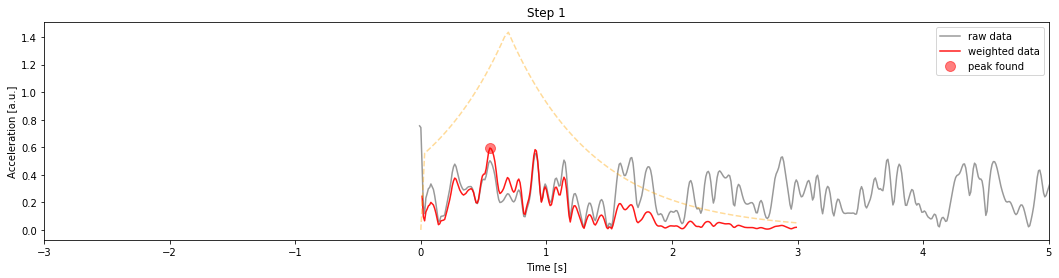

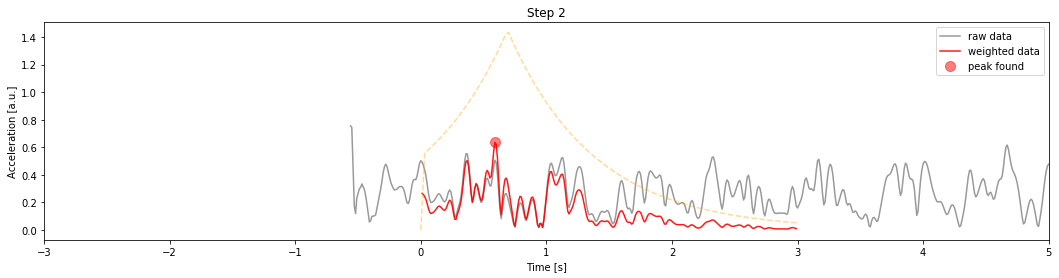

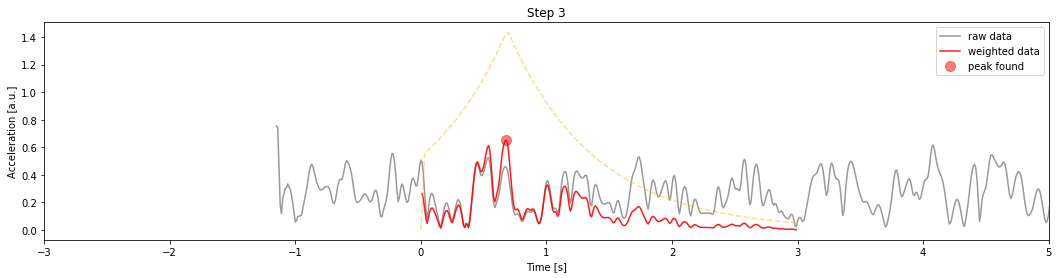

In [24]:
temporary = pd.DataFrame(Filtered)

max_df = pd.DataFrame()

peso = 1.
mean = 0.69

x = np.linspace(0, 3, 100)
y = []
for i in x:
    y.append(lambda_f(i,mean))
y = np.array(y)

temporary["Time"] = temporary["Time"] - temporary["Time"].min()          #start from zero

frag = temporary[(Filtered["Time"] > 0) & (temporary["Time"] < 0.8)]     #see in first interval and  
offset1 = temporary[temporary["values"] == frag["values"].max()]["Time"]  #get the time of the maximum in first window

temporary["Time"] = temporary["Time"] - offset1.values

time_window = temporary[(temporary["Time"] > (0) ) & (temporary["Time"] < (3.) )] #start a timewindow from the first peak
df_window = pd.DataFrame({"Time": time_window["Time"], "values": time_window["values"]})

weighted =  df_window["Time"].apply(lambda_f, mu = mean )*df_window["values"]*peso + df_window["values"]*(1-peso)
df_weighted = pd.DataFrame({"Time": df_window["Time"], "values_weighted": weighted})

offset2 = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]["Time"] #find new weighted max
max_df = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]

fig = plt.figure(figsize=(18,4))
plt.plot(temporary['Time'],temporary['values'],'k', alpha = 0.4, label = "raw data")
plt.plot(df_weighted['Time'],df_weighted['values_weighted'],'r', alpha = 0.9, label = "weighted data")
plt.plot(max_df['Time'], max_df['values_weighted'],'ro', alpha = 0.5, markersize = 10, label = 'peak found')
plt.plot(x, y, ls = 'dashed', color = 'orange', alpha = 0.4)
plt.xlim([-3,5])
plt.xlabel("Time [s]")
plt.title("Step 1")
plt.ylabel("Acceleration [a.u.]")
plt.legend()
plt.show()

offset2 = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]["Time"] #find new weighted max
temporary["Time"] = temporary["Time"] - offset2.values

time_window = temporary[(temporary["Time"] > (0) ) & (temporary["Time"] < (3.) )] #start a timewindow from the first peak
df_window = pd.DataFrame({"Time": time_window["Time"], "values": time_window["values"]})

weighted =  df_window["Time"].apply(lambda_f, mu = mean )*df_window["values"]*peso + df_window["values"]*(1-peso)
df_weighted = pd.DataFrame({"Time": df_window["Time"], "values_weighted": weighted})

offset3 = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]["Time"] #find new weighted max
max_df = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]

fig = plt.figure(figsize=(18,4))
plt.plot(temporary['Time'],temporary['values'],'k', alpha = 0.4, label = "raw data")
plt.plot(df_weighted['Time'],df_weighted['values_weighted'],'r', alpha = 0.9, label = "weighted data")
plt.plot(max_df['Time'], max_df['values_weighted'],'ro', alpha = 0.5, markersize = 10, label = 'peak found')
plt.xlim([-3,5])
plt.plot(x, y, ls = 'dashed', color = 'orange', alpha = 0.4)
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [a.u.]")
plt.title("Step 2")
plt.legend()
plt.show()

offset3 = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]["Time"] #find new weighted max
temporary["Time"] = temporary["Time"] - offset3.values

time_window = temporary[(temporary["Time"] > (0) ) & (temporary["Time"] < (3.) )] #start a timewindow from the first peak
df_window = pd.DataFrame({"Time": time_window["Time"], "values": time_window["values"]})

weighted =  df_window["Time"].apply(lambda_f, mu = mean )*df_window["values"]*peso + df_window["values"]*(1-peso)
df_weighted = pd.DataFrame({"Time": df_window["Time"], "values_weighted": weighted})
max_df = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]

fig = plt.figure(figsize=(18,4))
plt.plot(temporary['Time'],temporary['values'],'k', alpha = 0.4, label = "raw data")
plt.plot(df_weighted['Time'],df_weighted['values_weighted'],'r', alpha = 0.9, label = "weighted data")
plt.xlim([-3,5])
plt.plot(max_df['Time'], max_df['values_weighted'],'ro', alpha = 0.5, markersize = 10, label = 'peak found')
plt.plot(x, y, ls = 'dashed', color = 'orange', alpha = 0.4)
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [a.u.]")
plt.title("Step 3")
plt.legend()
plt.show()

In [25]:
def convolution(dataset, peso):
    mus = []
    medie = []
    varianze = []
    battiti = []
    pesi = []  #quanto vale la convoluzione esponenziale*dataset rispetto all'altra
    
    for mean in np.arange(0.60, 1.0, 0.01):

        dataset["Time"] = dataset["Time"] - dataset["Time"].min()                #start from zero        
        
        frag = dataset[(dataset["Time"] > 0) & (dataset["Time"] < 0.8)]          #see in first interval and
        offset = dataset[dataset["values"] == frag["values"].max()]["Time"]      #get the time of the maximum
        
        dataset["Time"] = dataset["Time"] - offset.values                        #use first maxima as starting point

        times_list = []
        
        for i in range(400):
            
            #translate old dataset
            if (i == 0):
                temporary = pd.DataFrame({"Time": dataset["Time"], "values": dataset["values"] })
            else:
                temporary = pd.DataFrame({"Time": dataset["Time"] - np.sum(np.array(times_list)), "values": dataset["values"] })

            #make a slicing and use a shorter time window (i.e. assumption that heartbeat is within 3 sec)
            time_window = temporary[(temporary["Time"] > (0) ) & (temporary["Time"] < (3.) )] 
            df_window = pd.DataFrame({"Time": time_window["Time"].values, "values": time_window["values"]})

            #"center" the exponential in zero (i.e. offset) and make the convolution with the probability
            weighted = df_window["Time"].apply(lambda_f, mu = mean )*df_window["values"]*peso + df_window["values"]*(1-peso)
            df_weighted = pd.DataFrame({"Time": df_window["Time"], "values_weighted": weighted})

            #find the maximum and its time
            offset = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]["Time"] #times for first max
    
            if ( (temporary["Time"].max()) < 1): 
                break
            else: 
                times_list.append(offset.values[0])
    
        (mu, sigma) = stats.norm.fit(times_list)
        gauss = norm(loc = mu, scale = sigma)
#    print("With mean: ", mean, "We found", len(times_list), "heartbeats.")
#    print("Time between heartbeats is: ", mu , ".   Variance is: ",  sigma, "\n" )
    
        mus.append(mean)                    #mean used for the exponential
        medie.append(mu)                    #mu found by gaussian interpolation
        varianze.append(sigma)              #sigma found by gaussian interpolation
        battiti.append(len(times_list))     #number of heartbeats
        pesi.append(peso*100)               #weights for the convolution
        
    return  pd.DataFrame({"Mu used [s]": mus, "Mean found [s]": medie , 
                        "Variance found [s]": varianze, "Number of heartbeats": battiti, 
                        "Convolution weight [%]": pesi})

In [26]:
summary = pd.DataFrame()

for peso in np.arange(0.3, 1.1, 0.1):
    summary = summary.append(convolution(Filtered, peso))

#best results are the ones with lowest variance
summary.sort_values("Variance found [s]")

Mu used [s]  Mean found [s]  Variance found [s]  Number of heartbeats  \
3          0.63        0.687326            0.088297                    86   
4          0.64        0.687326            0.091644                    86   
5          0.65        0.687326            0.094468                    86   
2          0.62        0.679425            0.098615                    87   
5          0.65        0.687442            0.099103                    86   
6          0.66        0.687442            0.101273                    86   
4          0.64        0.687442            0.102608                    86   
7          0.67        0.687442            0.102823                    86   
9          0.69        0.687442            0.103465                    86   
8          0.68        0.687442            0.104938                    86   
6          0.66        0.687442            0.106424                    86   
7          0.67        0.687442            0.106577                    86   
10         0.70        0.695529            0.107512                    85   
11         0.71        0.695529            0.108384                    85   
3          0.63        0.679540            0.108510                    87   
8          0.68        0.687442            0.108737                    86   
9          0.69        0.687442            0.109025                    86   
10         0.70        0.695529            0.109700                    85   
1          0.61        0.664157            0.111766                    89   
0          0.60        0.664157            0.111776                    89   
11         0.71        0.695529            0.112119                    85   
0          0.60        0.664157            0.112638                    89   
8          0.68        0.687442            0.112923                    86   
12         0.72        0.695529            0.113940                    85   
2          0.62        0.671818            0.114926                    88   
9          0.69        0.695529            0.116685                    85   
12         0.72        0.695529            0.116947                    85   
1          0.61        0.664270            0.117854                    89   
14         0.74        0.703810            0.122871                    84   
13         0.73        0.703810            0.122978                    84   
..          ...             ...                 ...                   ...   
36         0.96        1.016441            0.470354                    59   
39         0.99        1.070893            0.472101                    56   
15         0.75        0.844648            0.480164                    71   
13         0.73        0.821507            0.482041                    73   
14         0.74        0.821507            0.482169                    73   
26         0.86        0.951905            0.489807                    63   
16         0.76        0.856714            0.490200                    70   
17         0.77        0.869130            0.499564                    69   
19         0.79        0.895075            0.501170                    67   
18         0.78        0.895075            0.501170                    67   
21         0.81        0.895075            0.503645                    67   
20         0.80        0.895075            0.503645                    67   
22         0.82        0.908636            0.505620                    66   
23         0.83        0.922615            0.512206                    65   
27         0.87        0.951905            0.519260                    63   
29         0.89        0.967258            0.522325                    62   
28         0.88        0.967258            0.522325                    62   
26         0.86        0.937031            0.522735                    64   
24         0.84        0.922615            0.523416                    65   
25         0.85        0.922615            0.523416                    65   


In [27]:
summary.sort_values("Variance found [s]").head(10)

Mu used [s]  Mean found [s]  Variance found [s]  Number of heartbeats  \
3         0.63        0.687326            0.088297                    86   
4         0.64        0.687326            0.091644                    86   
5         0.65        0.687326            0.094468                    86   
2         0.62        0.679425            0.098615                    87   
5         0.65        0.687442            0.099103                    86   
6         0.66        0.687442            0.101273                    86   
4         0.64        0.687442            0.102608                    86   
7         0.67        0.687442            0.102823                    86   
9         0.69        0.687442            0.103465                    86   
8         0.68        0.687442            0.104938                    86   

   Convolution weight [%]  
3                   100.0  
4                   100.0  
5                   100.0  
2                   100.0  
5                    90.0  
6                   100.0  
4                    90.0  
7                   100.0  
9                   100.0  
8                   100.0

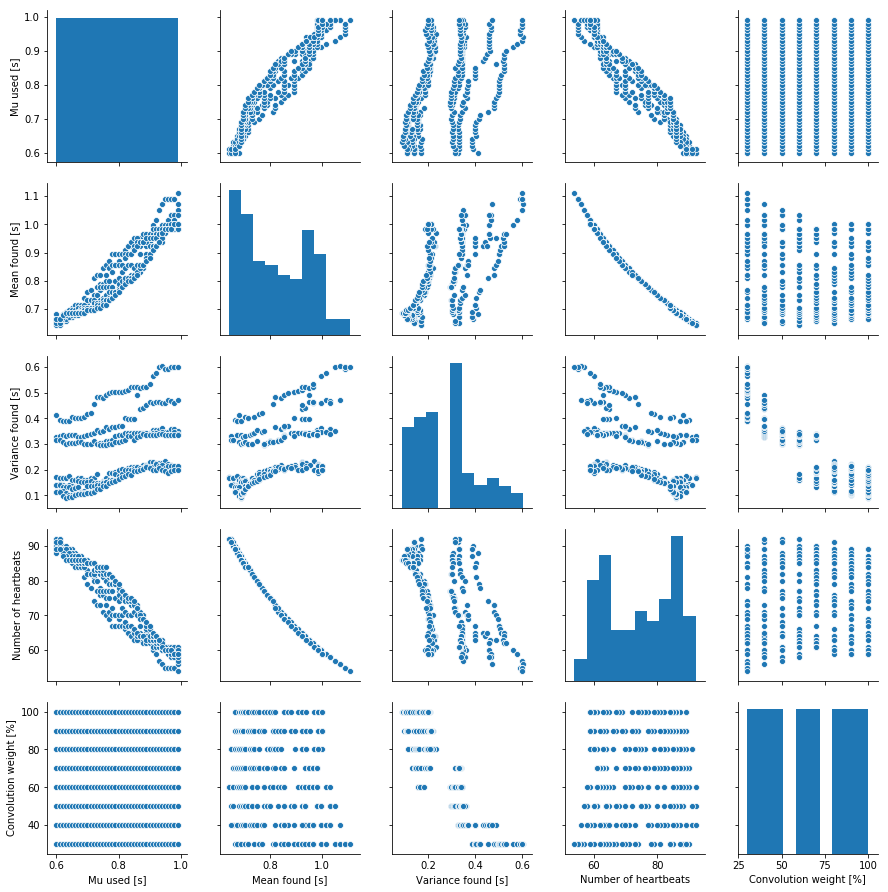

In [28]:
sns.pairplot(summary)

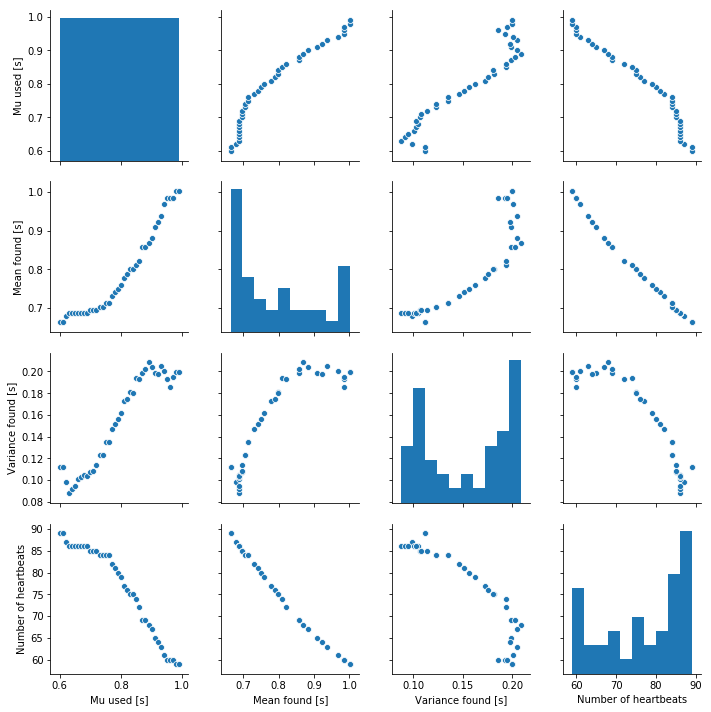

In [29]:
average_best = convolution(Filtered, 1.)
sns.pairplot(average_best[["Mu used [s]","Mean found [s]","Variance found [s]","Number of heartbeats"]])

# SEE TIMES DISTRIBUTION FOR THE BEST ESTIMATE

In [30]:
Filtered["Time"] = Filtered["Time"] - Filtered["Time"].min()                #start from zero        
        
frag = Filtered[(Filtered["Time"] > 0) & (Filtered["Time"] < 0.8)]          #see in first interval and
offset = Filtered[Filtered["values"] == frag["values"].max()]["Time"]      #get the time of the maximum
        
Filtered["Time"] = Filtered["Time"] - offset.values                        #use first maximum as starting point

times_list = []
peso = 1
mean = 0.63

for i in range(400):
            
#translate old Filtered
    if (i == 0):
        temporary = pd.DataFrame({"Time": Filtered["Time"], "values": Filtered["values"] })
    else:
        temporary = pd.DataFrame({"Time": Filtered["Time"] - np.sum(np.array(times_list)), "values": Filtered["values"] })

            #make a slicing and use a shorter time window (i.e. assumption that heartbeat is within 3 sec)
    time_window = temporary[(temporary["Time"] > (0) ) & (temporary["Time"] < (3.) )] 
    df_window = pd.DataFrame({"Time": time_window["Time"].values, "values": time_window["values"]})

            #"center" the exponential in zero (i.e. offset) and make the convolution with the probability
    weighted = df_window["Time"].apply(lambda_f, mu = mean )*df_window["values"]*peso + df_window["values"]*(1-peso)
    df_weighted = pd.DataFrame({"Time": df_window["Time"], "values_weighted": weighted})

            #find the maximum and its time
    offset = df_weighted[df_weighted["values_weighted"] == df_weighted["values_weighted"].max()]["Time"] #times for first max
    
    if ( (temporary["Time"].max()) < 1): 
        break
    else: 
        times_list.append(offset.values[0])
    
    (mu, sigma) = stats.norm.fit(times_list)
    gauss = norm(loc = mu, scale = sigma)

In [31]:
#####################################################################################
#Returns chi square, given observed values, function to be tested and its number of parameters
#####################################################################################
def chisq(observed, predic, params):
    chisquare = 0
    dof = len(observed)-params
    for i in observed:
        chisquare += ((i-predic(i))**2)/predic(i)
    
    return (chisquare/dof)

Parameters of gaussian functions all times are:  0.6873255813953488 0.08829686210290923

ChiSquare gauss =  2.247806272447347 0.8661960297698572 





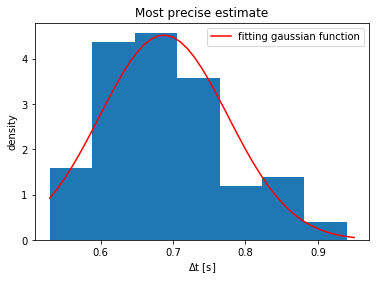

In [32]:
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import chi2


#fit with gauss and then instantiate it
(mu, sigma) = stats.norm.fit(times_list)
gauss = norm(loc = mu, scale = sigma)

#compute chi square and print results
chisq_gauss  = chisq( times_list , gauss.pdf, 2) #NORMAL CHISQUARE

print("Parameters of gaussian functions all times are: ", mu, sigma)
print("\nChiSquare gauss = ", chisq_gauss, chi2.cdf(chisq_gauss, df = 1), "\n\n\n" )

x = np.arange(min(times_list), max(times_list) + 0.01, 0.01)

#plot everything
plt.plot(x, gauss.pdf(x), color = 'red', label = "fitting gaussian function")
plt.hist(times_list, bins = 7, density = True)
plt.xlabel("$\Delta$t [s]")
plt.ylabel("density")
plt.legend()
plt.title("Most precise estimate")
plt.show()

In [33]:
print('The std of BPM',(60/(mu)**2)*sigma)
print('BPM:', 60/mu)

The std of BPM 11.214282804699815
BPM: 87.29487396379632


# HRV

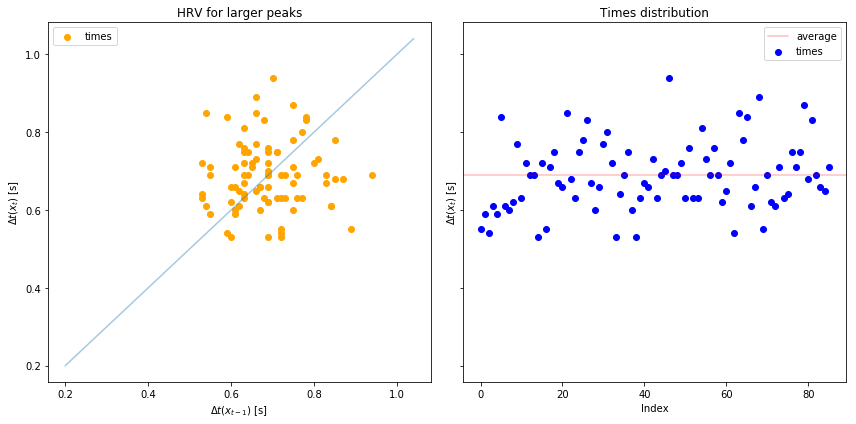

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

x = np.linspace(0.2, max(times_list)+0.1,100)
ax[0].scatter(times_list[:-1], times_list[1:], color = 'orange', label = "times")
ax[0].set_title("HRV for larger peaks")
ax[0].set_xlabel("$\Delta t (x_{t-1})$ [s]")
ax[0].set_ylabel("$\Delta t (x_{t})$ [s]")
ax[0].plot(x,x, alpha = 0.4)
ax[0].legend()

ax[1].scatter(np.arange(len(times_list)), times_list, color = 'blue', label = "times")
ax[1].set_title("Times distribution")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("$\Delta t (x_{t})$ [s]")
ax[1].axhline(0.69, color = 'red', alpha = 0.25, label = 'average')
ax[1].legend()
plt.tight_layout()
plt.show()

In [35]:
c = np.array([1,4,7])

In [36]:
np.mean(c)

4.0

In [37]:
np.std(c)

2.449489742783178